### Comparing Euphonic and Ab2tds

In [1]:
# Ignore errors resulting from matplotlib's fig.show(). This causes
# a warning when run from a notebook, but is still required if the
# scripts are run from the CL
import warnings
warnings.simplefilter("ignore", UserWarning)

### Structure Factor Comparison

Note that only the raw unbinned structure factors are used in the Ab2tds comparison, because it is not possible to get the Ab2tds S(Q,w) without a resolution function applied, and therefore a fair comparison isn't possible with the binned S(Q,w).

#### Comparison Scripts

The `compare_sf` script can read structure factors from both Euphonic `StructureFactor` objects in a `.json` file, and Ab2tds structure factors written to a `alongthelineF.dat` file, and calculates the mean, min and max absolute/relative errors. It also applies a scaling factor, and sums the structure factors over degenerate modes. See the script for details on how it does this.

This scripts can be run for all the cuts for different materials to give an idea of how well they compare to experimental data.

#### Comparing with eigenvalues/vectors read from .phonon

Lets start with comparing the Ab2tds structure factors with Euphonic's structure factors that have been calculated with frequencies/eigenvectors read from a `.phonon` file:

In [2]:
from compare_sf import main as compare_sf_main
from compare_sqw import main as compare_sqw_main

quartz_cuts = ['2ph_m4_0_qe', '30L_qe']
for cut in quartz_cuts:
    compare_sf_main(['--sf1', '../../quartz/' + cut + '/euphonic/sf_phonons_100K.json',
                     '--sf2', '../../quartz/' + cut + '/ab2tds/alongthelineF_100K.dat'])

lzo_cuts = ['kagome_qe', 'hh2_qe']
for cut in lzo_cuts:
    compare_sf_main(['--sf1', '../../lzo/' + cut + '/euphonic/sf_phonons_300K.json',
                     '--sf2', '../../lzo/' + cut + '/ab2tds/alongthelineF_300K.dat'])


Results for ../../quartz/2ph_m4_0_qe/euphonic/sf_phonons_100K.json ../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_100K.dat
Absolute Error - mean: 4.6726310138278893e-08 max: 8.771275944425769e-05 min: 1.5503279671338899e-18
Relative Error - mean: 0.0035948442454901215 max: 0.20587429276864913 min: 5.177800648450457e-08

Results for ../../quartz/30L_qe/euphonic/sf_phonons_100K.json ../../quartz/30L_qe/ab2tds/alongthelineF_100K.dat
Absolute Error - mean: 3.2506643807483944e-10 max: 4.575939232826648e-07 min: 1.2786292156330635e-17
Relative Error - mean: 0.0019877262681418793 max: 0.05338656149827582 min: 4.2267131782193544e-07

Results for ../../lzo/kagome_qe/euphonic/sf_phonons_300K.json ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 2.6061351104422008e-06 max: 0.0020175869410402614 min: 3.8914142380054763e-16
Relative Error - mean: 0.02072188698553298 max: 3.60553091572946 min: 3.0822712870277296e-06

Results for ../../lzo/hh2_qe/euphonic/sf_phonons_300K.json 

The errors for the Quartz cuts are very small - showing mean relative errors of 0.2% and 0.3%, which is satisfactory.

However, the errors for LZO seem much higher - one mean error is 1.6% and maximum errors are 95% and 25%. Lets investigate the `kagome_300K_qe` cut further, first by running with both Euphonic and Ab2tds at a lower temperature - 100K instead of 300K:

In [3]:
cut = 'kagome_qe'
compare_sf_main(['--sf1', '../../lzo/' + cut + '/euphonic/sf_phonons_100K.json',
                 '--sf2', '../../lzo/' + cut + '/ab2tds/alongthelineF_100K.dat'])


Results for ../../lzo/kagome_qe/euphonic/sf_phonons_100K.json ../../lzo/kagome_qe/ab2tds/alongthelineF_100K.dat
Absolute Error - mean: 4.2808383788196183e-07 max: 0.00032312899714653787 min: 5.826038737109541e-17
Relative Error - mean: 0.007675156765952625 max: 1.3488109129264791 min: 3.7099340476906613e-07


This reduces the mean error to 0.5% - so the temperature does have an effect (although the maximum relative error is actually higher!). The difference then is likely to be down to a temperature dependent effect - either the Debye-Waller or population factor.

Ab2tds calculates the population factor in a strange way - which actually results in overflow at lower temperatures (which is why the Quartz calculation hasn't been done at 5K like the experiment). Maybe the method of calculating the population factor results in rounding errors, or is a slightly different formulation to the Bose calculated in Euphonic.

But the overall relative errors might be giving a pessimistic picture of the comparison. Looking at the 300K `kagome_qe` data again, we can look at which q-points are causing the largest relative error using the `-n` argument and take a closer look.

In [4]:
cut = 'kagome_qe'
compare_sf_main(['--sf1', '../../lzo/kagome_qe/euphonic/sf_phonons_300K.json',
                 '--sf2', '../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat', '-n', '5'])


Results for ../../lzo/kagome_qe/euphonic/sf_phonons_300K.json ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 2.6061351104422008e-06 max: 0.0020175869410402614 min: 3.8914142380054763e-16
Relative Error - mean: 0.02072188698553298 max: 3.60553091572946 min: 3.0822712870277296e-06
Points with largest mean relative error: (array([79, 40, 80, 61, 39]), array([1, 0, 0, 0, 0]))


The q-point with the largest errors is 79 so lets look at that first with the `--qpts` argument


Results for ../../lzo/kagome_qe/euphonic/sf_phonons_300K.json ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 2.6061351104422008e-06 max: 0.0020175869410402614 min: 3.8914142380054763e-16
Relative Error - mean: 0.02072188698553298 max: 3.60553091572946 min: 3.0822712870277296e-06


<IPython.core.display.Javascript object>


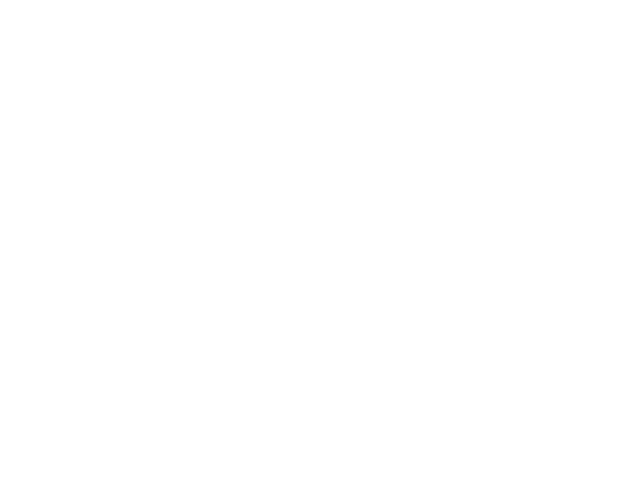

In [5]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../lzo/kagome_qe/euphonic/sf_phonons_300K.json',
                 '--sf2', '../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat', '--qpts', '79'])

Overall the comparison between Euphonic and Ab2tds appears good, there are just 2 low-energy peaks that don't seem to compare well. What's the effect if we don't use the Bose factor in the Euphonic calculation?


Results for ../../lzo/kagome_qe/euphonic/sf_phonons_300K.json ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 0.00023924922958790918 max: 0.2219575642716266 min: 2.690905398508892e-16
Relative Error - mean: 0.2629196421158255 max: 0.9999923838656665 min: 5.520629585142322e-05


<IPython.core.display.Javascript object>


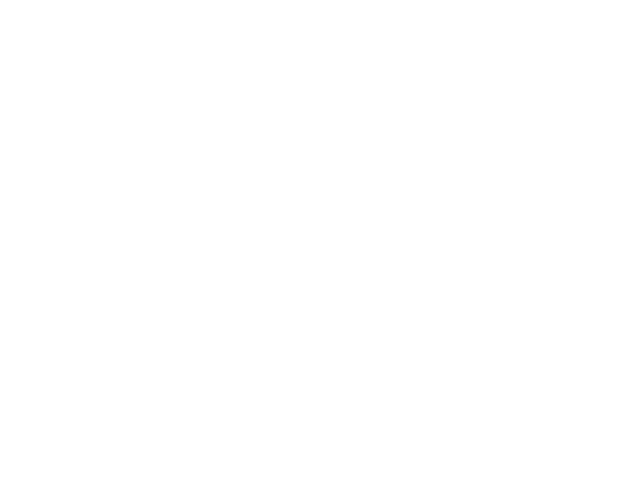

In [6]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../lzo/kagome_qe/euphonic/sf_phonons_300K.json',
                 '--sf2', '../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat', '--qpts', '79', '--nobose'])

This has quite a drastic effect, particularly on those 2 low-energy peaks. This might support the fact that there is some sort of discrepancy between the population factor in Ab2tds and Euphonic. However, it is only minor and only appears at certain q-points and modes.

Now lets look at the q-point with the second-highest error:


Results for ../../lzo/kagome_qe/euphonic/sf_phonons_300K.json ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 2.6061351104422008e-06 max: 0.0020175869410402614 min: 3.8914142380054763e-16
Relative Error - mean: 0.02072188698553298 max: 3.60553091572946 min: 3.0822712870277296e-06


<IPython.core.display.Javascript object>


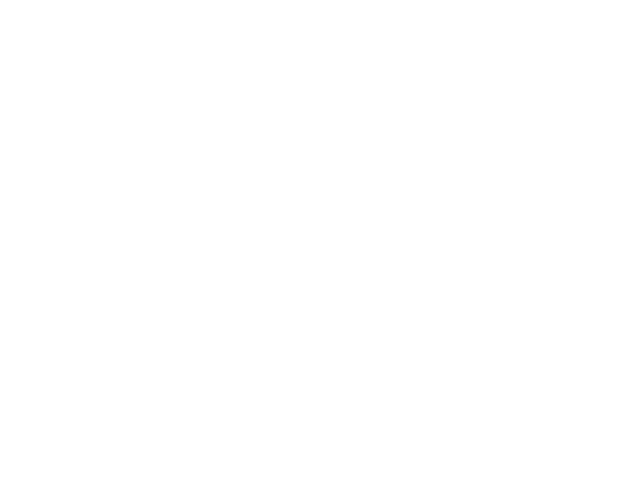

In [7]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../lzo/kagome_qe/euphonic/sf_phonons_300K.json',
                 '--sf2', '../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat', '--qpts', '40'])

This is a gamma point, and there is quite a large discrepancy in the Bragg peak, with the value calculated for Euphonic around 50% larger than with Ab2tds. However, the structure factor does include a 1/frequency term, which can have a large effect at small frequencies, particularly if there are rounding errors due to unit conversion. If you zoom in on the plot the other structure factors match quite well.

We can mask out the Bragg peaks by using the `--mask-bragg` argument and check q-points 40 again:


Results for ../../lzo/kagome_qe/euphonic/sf_phonons_300K.json ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 2.5236427162994803e-11 max: 8.532638043536724e-10 min: 3.78145765830553e-16
Relative Error - mean: 0.019791269494876276 max: 3.6050997892599814 min: 7.607834286460452e-06


<IPython.core.display.Javascript object>


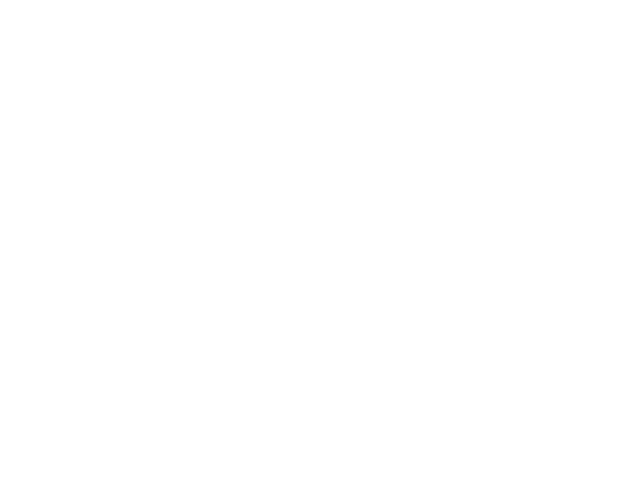

In [8]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../lzo/kagome_qe/euphonic/sf_phonons_300K.json',
                 '--sf2', '../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat', '--qpts', '40', '--mask-bragg'])

As a final sanity-check lets plot some of the highest-error points for quartz

In [9]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../quartz/2ph_m4_0_qe/euphonic/sf_phonons_100K.json',
                 '--sf2', '../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_100K.dat', '-n', '5'])


Results for ../../quartz/2ph_m4_0_qe/euphonic/sf_phonons_100K.json ../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_100K.dat
Absolute Error - mean: 4.6726310138278893e-08 max: 8.771275944425769e-05 min: 1.5503279671338899e-18
Relative Error - mean: 0.0035948442454901215 max: 0.20587429276864913 min: 5.177800648450457e-08
Points with largest mean relative error: (array([  5, 177,  67,  50, 174]), array([11,  1, 14, 11,  6]))



Results for ../../quartz/2ph_m4_0_qe/euphonic/sf_phonons_100K.json ../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_100K.dat
Absolute Error - mean: 4.6726310138278893e-08 max: 8.771275944425769e-05 min: 1.5503279671338899e-18
Relative Error - mean: 0.0035948442454901215 max: 0.20587429276864913 min: 5.177800648450457e-08


<IPython.core.display.Javascript object>


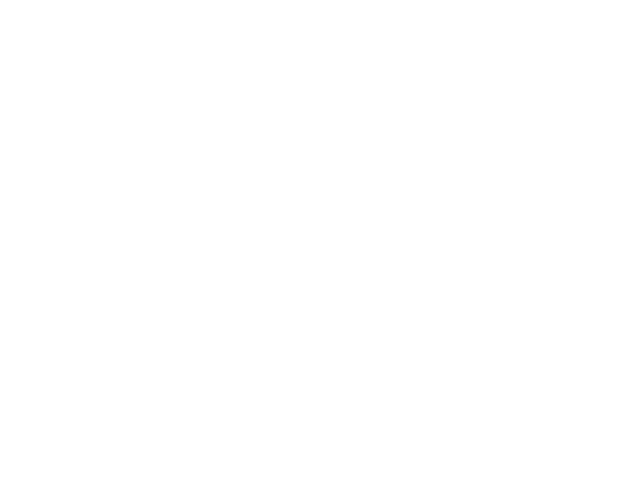

<IPython.core.display.Javascript object>


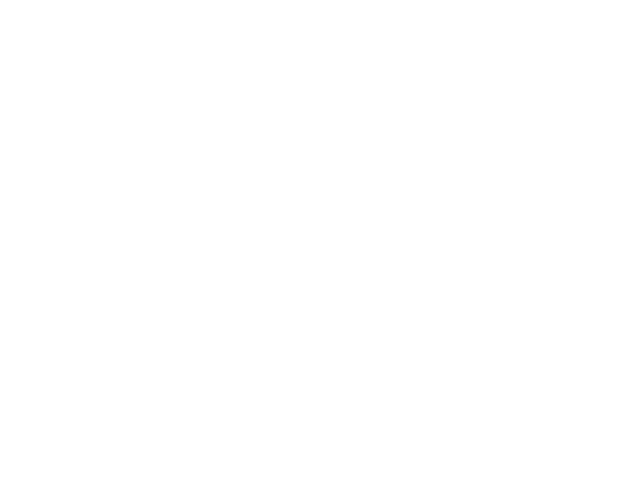

<IPython.core.display.Javascript object>


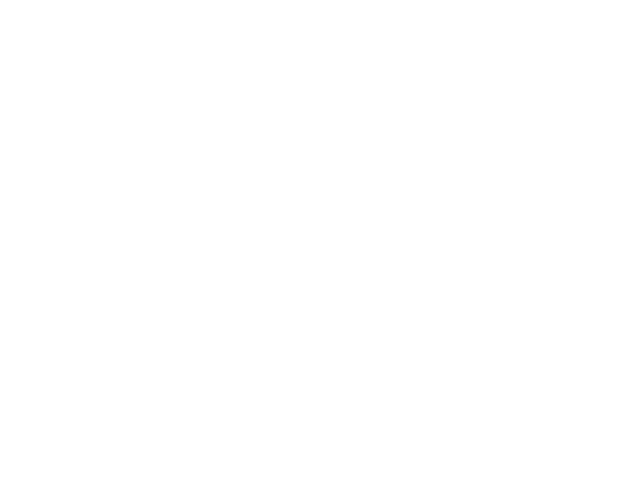

In [10]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../quartz/2ph_m4_0_qe/euphonic/sf_phonons_100K.json',
                 '--sf2', '../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_100K.dat', '--qpts', '5,177,67'])

#### Comparing with eigenvalues/vectors interpolated from .castep_bin

The `sf_phonons_100K.json` files contain Euphonic structure factors calculated with frequencies read from a `.phonon` file, but to test Euphonic's interpolation we'll now read from `sf_fc_100K.json` files which have been calculated with frequencies interpolated from a force constants matrix from a .castep_bin.

In [11]:
from compare_sf import main as compare_sf_main
from compare_sqw import main as compare_sqw_main

quartz_cuts = ['2ph_m4_0_qe', '30L_qe']
for cut in quartz_cuts:
    compare_sf_main(['--sf1', '../../quartz/' + cut + '/euphonic/sf_fc_100K.json',
                     '--sf2', '../../quartz/' + cut + '/ab2tds/alongthelineF_100K.dat'])

lzo_cuts = ['kagome_qe', 'hh2_qe']
for cut in lzo_cuts:
    compare_sf_main(['--sf1', '../../lzo/' + cut + '/euphonic/sf_fc_300K.json',
                     '--sf2', '../../lzo/' + cut + '/ab2tds/alongthelineF_300K.dat'])


Results for ../../quartz/2ph_m4_0_qe/euphonic/sf_fc_100K.json ../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_100K.dat
Absolute Error - mean: 2.1377113683277806 max: 4927.503246858536 min: 3.9318507904717146e-19
Relative Error - mean: 31.84397197669621 max: 28053.574921895317 min: 0.8435766155385237

Results for ../../quartz/30L_qe/euphonic/sf_fc_100K.json ../../quartz/30L_qe/ab2tds/alongthelineF_100K.dat
Absolute Error - mean: 0.020293707691224804 max: 28.715596377392487 min: 4.5467602257409596e-18
Relative Error - mean: 32.53902199276091 max: 45453.0586365641 min: 2.487229220965352e-07

Results for ../../lzo/kagome_qe/euphonic/sf_fc_300K.json ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 22341.6561228515 max: 28935924.486323122 min: 4.695315281248864e-12
Relative Error - mean: 420.5159258182836 max: 125789.73491163185 min: 0.9991136312113331

Results for ../../lzo/hh2_qe/euphonic/sf_fc_300K.json ../../lzo/hh2_qe/ab2tds/alongthelineF_300K.dat
Absolute Error -

Those errors are huge! Let's see what q-points are causing them:

In [12]:
cut = 'kagome_qe'
compare_sf_main(['--sf1', '../../lzo/kagome_qe/euphonic/sf_fc_300K.json',
                 '--sf2', '../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat', '-n', '5'])


Results for ../../lzo/kagome_qe/euphonic/sf_fc_300K.json ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 22341.6561228515 max: 28935924.486323122 min: 4.695315281248864e-12
Relative Error - mean: 420.5159258182836 max: 125789.73491163185 min: 0.9991136312113331
Points with largest mean relative error: (array([ 0, 10, 20, 40, 30]), array([0, 0, 0, 0, 0]))



Results for ../../lzo/kagome_qe/euphonic/sf_fc_300K.json ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 22341.6561228515 max: 28935924.486323122 min: 4.695315281248864e-12
Relative Error - mean: 420.5159258182836 max: 125789.73491163185 min: 0.9991136312113331


<IPython.core.display.Javascript object>


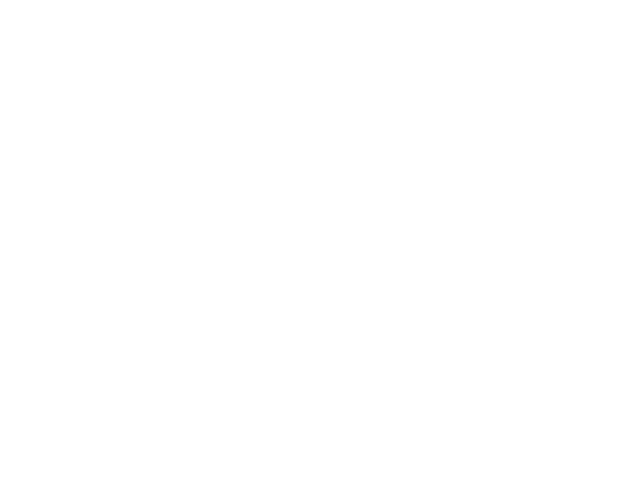

<IPython.core.display.Javascript object>


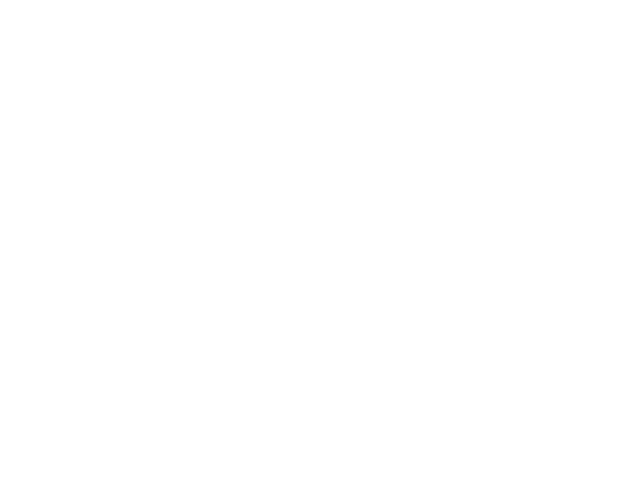

In [13]:
compare_sf_main(['--sf1', '../../lzo/kagome_qe/euphonic/sf_fc_300K.json',
                 '--sf2', '../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat', '--qpts', '0,10'])

These are all gamma points, and the Bragg peaks are producing the huge errors. This is because the acoustic mode frequencies at gamma points when calculated with Euphonic are very close to zero (~1e-6 or less) because of the way the acoustic sum rule is implemented. Then due to the 1/frequency in the structure factor calculation, you are dividing by almost zero and the calculation is unstable. Therefore it isn't suitable to use Bragg peaks in the comparison.

To get a fairer comparison we can mask out the Bragg peaks using the `--mask-bragg` argument:

In [14]:
from compare_sf import main as compare_sf_main
from compare_sqw import main as compare_sqw_main

quartz_cuts = ['2ph_m4_0_qe', '30L_qe']
for cut in quartz_cuts:
    compare_sf_main(['--sf1', '../../quartz/' + cut + '/euphonic/sf_fc_100K.json',
                     '--sf2', '../../quartz/' + cut + '/ab2tds/alongthelineF_100K.dat', '--mask-bragg'])

lzo_cuts = ['kagome_qe', 'hh2_qe']
for cut in lzo_cuts:
    compare_sf_main(['--sf1', '../../lzo/' + cut + '/euphonic/sf_fc_300K.json',
                     '--sf2', '../../lzo/' + cut + '/ab2tds/alongthelineF_300K.dat', '--mask-bragg'])


Results for ../../quartz/2ph_m4_0_qe/euphonic/sf_fc_100K.json ../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_100K.dat
Absolute Error - mean: 6.24972400270482e-13 max: 1.7787199201806665e-10 min: 3.932092955387527e-19
Relative Error - mean: 0.0011287387752350238 max: 0.038182664559557544 min: 1.0400427386504837e-07

Results for ../../quartz/30L_qe/euphonic/sf_fc_100K.json ../../quartz/30L_qe/ab2tds/alongthelineF_100K.dat
Absolute Error - mean: 3.965009812305526e-12 max: 1.5386647632734294e-09 min: 3.2104232692031124e-18
Relative Error - mean: 0.0028348505222035667 max: 0.2766110870034921 min: 5.070874450926455e-07

Results for ../../lzo/kagome_qe/euphonic/sf_fc_300K.json ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 2.887663043417057e-13 max: 2.574178781649327e-11 min: 2.0512954516487698e-17
Relative Error - mean: 0.0002157489317980908 max: 0.005286474044485599 min: 2.7536282220670623e-07

Results for ../../lzo/hh2_qe/euphonic/sf_fc_300K.json ../../lzo/hh2_qe/

This actually somehow produces a better comparison than reading the frequencies directly from `.phonon`, with mean errors of only 0.1% and 0.3% for Quartz, and 0.02% and 0.03% for LZO.

Now lets look at the same q-point as we looked at before for the `kagome_qe` cut:


Results for ../../lzo/kagome_qe/euphonic/sf_fc_300K.json ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 2.887663043417057e-13 max: 2.574178781649327e-11 min: 2.0512954516487698e-17
Relative Error - mean: 0.0002157489317980908 max: 0.005286474044485599 min: 2.7536282220670623e-07


<IPython.core.display.Javascript object>


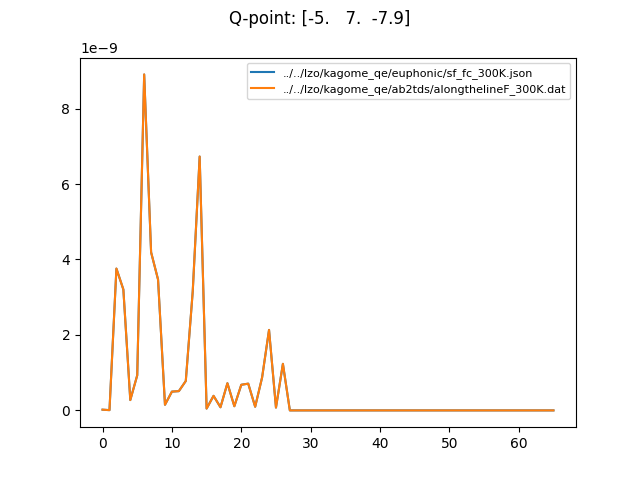

In [15]:
%matplotlib notebook
compare_sf_main(['--sf1', '../../lzo/kagome_qe/euphonic/sf_fc_300K.json',
                 '--sf2', '../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat', '--qpts', '79', '--mask-bragg'])

The discrepancy seen in the low-energy peaks is now gone! This demonstrates just how sensitive the structure factor is to floating point errors, and perhaps this discrepancy wasn't due to the Bose factor at all.

For a final check lets look at some random q-points from all the cuts


Results for ../../quartz/2ph_m4_0_qe/euphonic/sf_fc_100K.json ../../quartz/2ph_m4_0_qe/ab2tds/alongthelineF_100K.dat
Absolute Error - mean: 6.24972400270482e-13 max: 1.7787199201806665e-10 min: 3.932092955387527e-19
Relative Error - mean: 0.0011287387752350238 max: 0.038182664559557544 min: 1.0400427386504837e-07


<IPython.core.display.Javascript object>


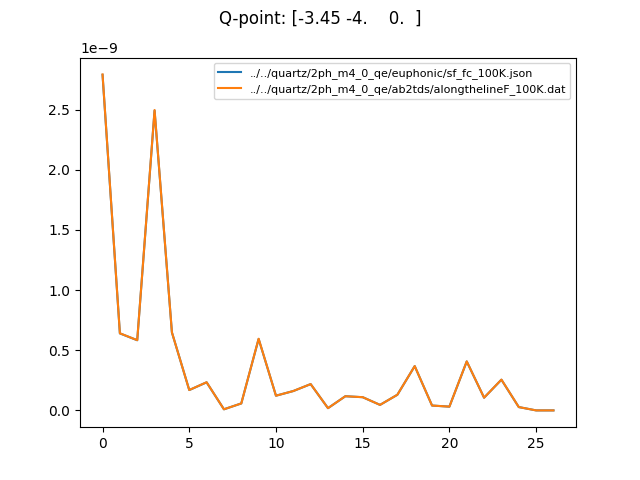

<IPython.core.display.Javascript object>


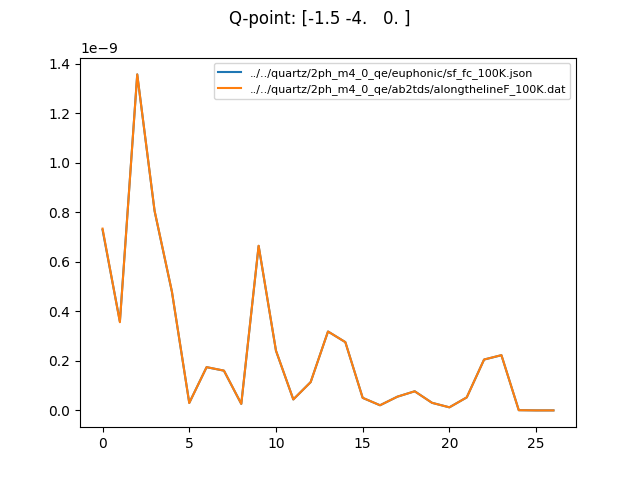


Results for ../../quartz/30L_qe/euphonic/sf_fc_100K.json ../../quartz/30L_qe/ab2tds/alongthelineF_100K.dat
Absolute Error - mean: 3.965009812305526e-12 max: 1.5386647632734294e-09 min: 3.2104232692031124e-18
Relative Error - mean: 0.0028348505222035667 max: 0.2766110870034921 min: 5.070874450926455e-07


<IPython.core.display.Javascript object>


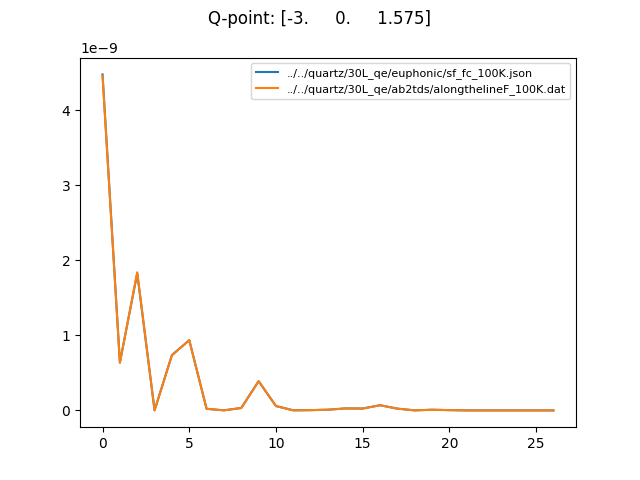

<IPython.core.display.Javascript object>


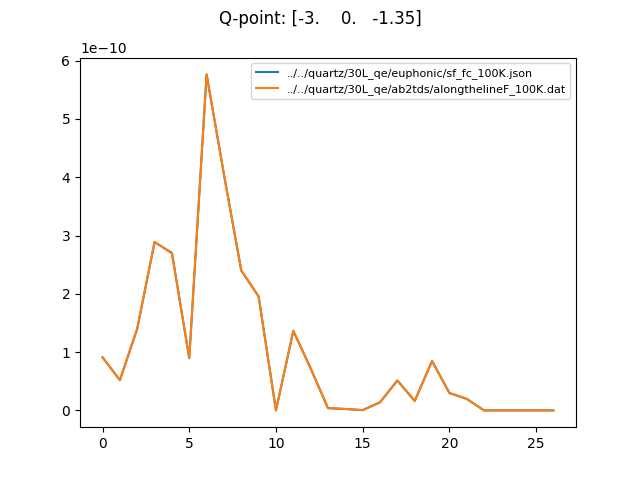


Results for ../../lzo/kagome_qe/euphonic/sf_fc_300K.json ../../lzo/kagome_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 2.887663043417057e-13 max: 2.574178781649327e-11 min: 2.0512954516487698e-17
Relative Error - mean: 0.0002157489317980908 max: 0.005286474044485599 min: 2.7536282220670623e-07


<IPython.core.display.Javascript object>


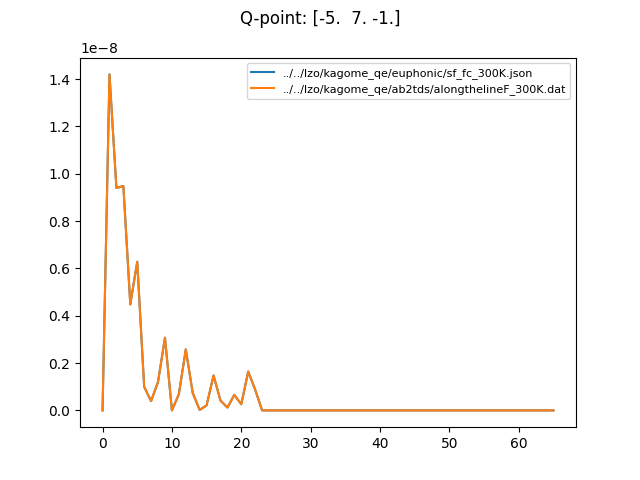

<IPython.core.display.Javascript object>


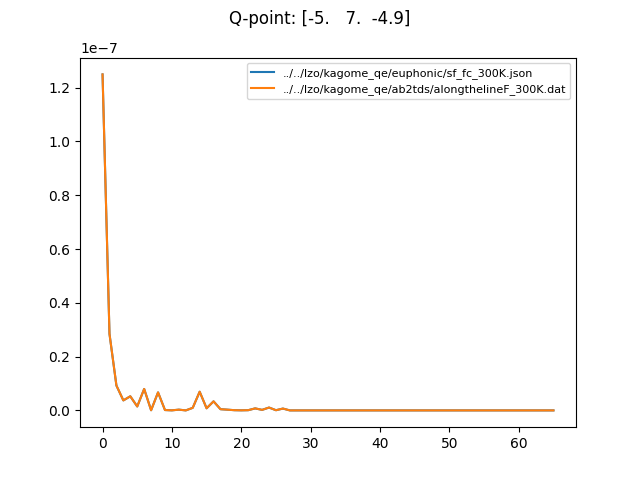


Results for ../../lzo/hh2_qe/euphonic/sf_fc_300K.json ../../lzo/hh2_qe/ab2tds/alongthelineF_300K.dat
Absolute Error - mean: 3.823193678096093e-13 max: 1.9290507780506499e-10 min: 7.970943582281108e-18
Relative Error - mean: 0.00031109674370349795 max: 0.005602047423598622 min: 1.1796171957443896e-08


<IPython.core.display.Javascript object>


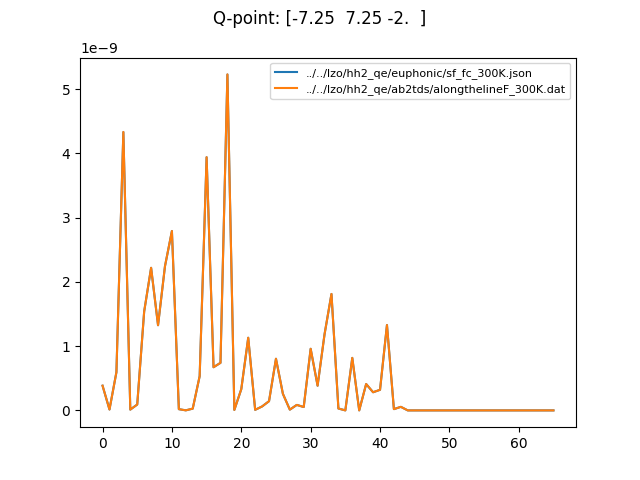

<IPython.core.display.Javascript object>


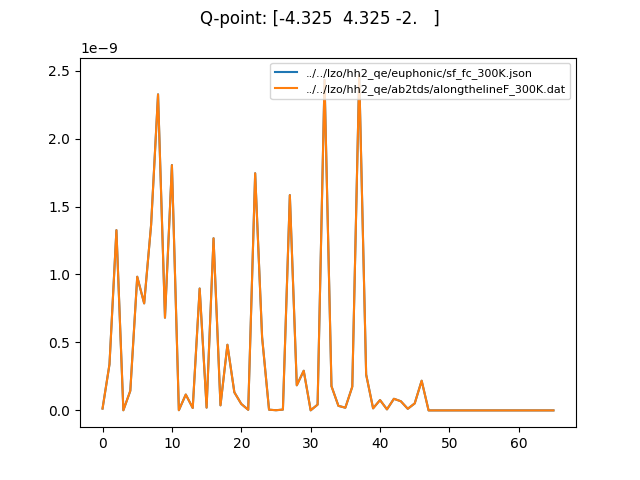

In [16]:
from compare_sf import main as compare_sf_main
from compare_sqw import main as compare_sqw_main

quartz_cuts = ['2ph_m4_0_qe', '30L_qe']
for cut in quartz_cuts:
    compare_sf_main(['--sf1', '../../quartz/' + cut + '/euphonic/sf_fc_100K.json',
                     '--sf2', '../../quartz/' + cut + '/ab2tds/alongthelineF_100K.dat', '--mask-bragg',
                     '--qpts', '10,49'])

lzo_cuts = ['kagome_qe', 'hh2_qe']
for cut in lzo_cuts:
    compare_sf_main(['--sf1', '../../lzo/' + cut + '/euphonic/sf_fc_300K.json',
                     '--sf2', '../../lzo/' + cut + '/ab2tds/alongthelineF_300K.dat', '--mask-bragg',
                     '--qpts', '10,49'])